In [11]:
import os # operating system operations like check files existance
import datetime # time and date operations
import gc # garbage collector
import pandas as pd # data frames wrangling
import numpy as np # math functions
from IPython.core.interactiveshell import InteractiveShell
import matplotlib.pyplot as plt


InteractiveShell.ast_node_interactivity = "all"  # multiple output per jupyter notebook code block

In [12]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

In [13]:
crypto = pd.read_csv('twtcrypto.csv')

In [14]:
crypto.head()

,Unnamed: 0,datetime,num,posi,nega,Sentiment,close,close_nextday,daily return,vol,mktcap
0,0,2020/1/21,20,8,12,0.600000,8745.89,8680.88,-0.007433,24097418512,158.947997
1,1,2020/1/22,28,17,11,0.392857,8680.88,8406.52,-0.031605,22600204051,157.783273
2,2,2020/1/23,55,24,31,0.563636,8406.52,8445.43,0.004629,25770680779,152.813330
3,3,2020/1/24,44,23,21,0.477273,8445.43,8367.85,-0.009186,24397913026,153.536830
4,4,2020/1/25,51,35,16,0.313725,8367.85,8596.83,0.027364,19647331549,152.143263


In [15]:
def runplt(x, y,yl):
    plt.figure()
    plt.title("predicted-actual value comparison")
    plt.xlabel("date point")
    if yl == 'Bitcoin Price':
            plt.ylabel("Bitcoin Price")
    elif yl == 'Bitcoin Price Next Day':
            plt.ylabel("Bitcoin Price Next Day")
    elif yl == 'Bitcoin Trading Volume':
            plt.ylabel("Bitcoin Traindg Volume")
    elif yl == 'Bitcoin Daily Return':
            plt.ylabel("Bitcoin Daily Return")
    plt.plot(range(len(x)),x,'b',label="predict")
    plt.plot(range(len(y)),y,'r',label="test")
    plt.legend(loc="upper right")
    plt.grid(True)
    return plt

                            OLS Regression Results                            
Dep. Variable:          close_nextday   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     43.16
Date:                Fri, 10 Apr 2020   Prob (F-statistic):           6.01e-08
Time:                        14:33:54   Log-Likelihood:                -371.34
No. Observations:                  44   AIC:                             746.7
Df Residuals:                      42   BIC:                             750.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9597.5886    241.150     39.799      0.0

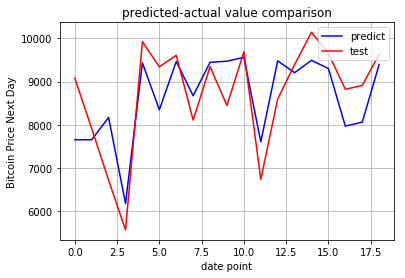

In [16]:
X=pd.DataFrame(crypto,columns=['num'])
y=crypto.close_nextday
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train).fit()
print(model.summary())
pred_value=model.params[0]+model.params[1]*X_test.num

# ---------- plot2
plt=runplt(pred_value,y_test, 'Bitcoin Price Next Day')
# plt.plot(pred_value,y_test)
plt.show()

                            OLS Regression Results                            
Dep. Variable:           daily return   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.025
Method:                 Least Squares   F-statistic:                    0.2801
Date:                Fri, 10 Apr 2020   Prob (F-statistic):              0.601
Time:                        14:34:32   Log-Likelihood:                 33.511
No. Observations:                  31   AIC:                            -63.02
Df Residuals:                      29   BIC:                            -60.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0343      0.081      0.422      0.6

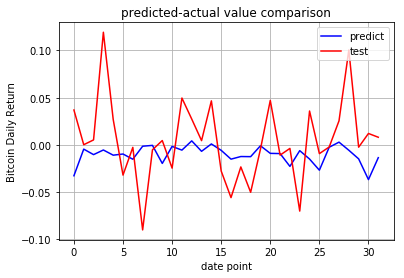

In [17]:
X=pd.DataFrame(crypto,columns=['Sentiment'])
y=crypto['daily return']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
X_train=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train).fit()
print(model.summary())
pred_value=model.params[0]+model.params[1]*X_test.Sentiment

# ---------- plot2
plt=runplt(pred_value,y_test,'Bitcoin Daily Return')
# plt.plot(pred_value,y_test)
plt.show()


                            OLS Regression Results                            
Dep. Variable:                    vol   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     26.99
Date:                Fri, 10 Apr 2020   Prob (F-statistic):           5.64e-06
Time:                        14:34:54   Log-Likelihood:                -1061.6
No. Observations:                  44   AIC:                             2127.
Df Residuals:                      42   BIC:                             2131.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.342e+10   1.57e+09     21.334      0.0

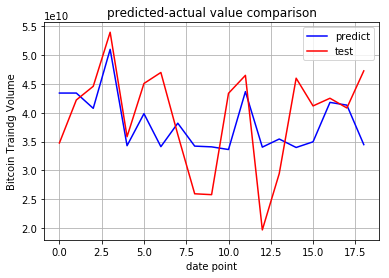

In [18]:
X=pd.DataFrame(crypto,columns=['num'])
y=crypto.vol
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train=sm.add_constant(X_train)
model=sm.OLS(y_train,X_train).fit()
print(model.summary())
pred_value=model.params[0]+model.params[1]*X_test.num

# ---------- plot2
plt=runplt(pred_value,y_test,'Bitcoin Trading Volume')
# plt.plot(pred_value,y_test)
plt.show()
